In [1]:
import scipy.linalg

import numpy as np
import matplotlib.pyplot as plt
from new_basis_llp_qaoa.statevector_sim.statevector_llp import StateVectorLLP
import numpy as np
from ibmq_utils import generate_random_dataset
from scipy.sparse import identity, csc_matrix
from scipy.sparse.linalg import expm, eigsh
from new_basis_llp_qaoa.statevector_sim.statevector_llp import unitary_a
from PIL import Image
import logging
from time import time
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

np.random.seed(40)
As, Qs = generate_random_dataset(4, 6)
state = "ones"
p = 1
svllp = StateVectorLLP(Qs, As, 1 / 20, p, state)

svllp.psi = svllp.get_initial_state(svllp.qubits_number)
sum(svllp.probabilities)


2024-01-27 22:49:11,053 - INFO - Getting initial state.


1.0

In [2]:
ub_cache = svllp.ub_integer_cache


2024-01-27 22:49:11,484 - INFO - Caching HB.
caching small ub: 100%|██████████| 17/17 [02:47<00:00,  9.85s/it]


In [3]:
ub_cache.keys()

dict_keys([0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7, -7, 8, -8, 9, -9, 10, -10, 11, -11, 12, -12, 13, -13, 14, -14, 15, -15, 16, -16])

In [4]:
svllp.p = 7
res = svllp.run_optimizer(maxiter=20)
res

2024-01-27 22:52:08,714 - INFO - Caching HA.
Optimizing:   5%|▌         | 1/20 [01:23<26:17, 83.01s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [0. 0. 0. 0. 0. 0. 0.] 
 -1.966706069094642


Optimizing:  10%|█         | 2/20 [02:44<24:35, 81.95s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [1. 0. 0. 0. 0. 0. 0.] 
 -1.9667368872298414


Optimizing:  15%|█▌        | 3/20 [04:05<23:09, 81.71s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [1. 1. 0. 0. 0. 0. 0.] 
 -1.9667677058479474


Optimizing:  20%|██        | 4/20 [05:28<21:57, 82.33s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [1. 1. 1. 0. 0. 0. 0.] 
 -1.9667985249489786


Optimizing:  25%|██▌       | 5/20 [06:58<21:16, 85.10s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [1. 1. 1. 1. 0. 0. 0.] 
 -1.966829344532946


Optimizing:  30%|███       | 6/20 [08:30<20:21, 87.23s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [1. 1. 1. 1. 1. 0. 0.] 
 -1.966860164599856


Optimizing:  35%|███▌      | 7/20 [10:04<19:24, 89.58s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [1. 1. 1. 1. 1. 1. 0.] 
 -1.9668909851497103


Optimizing:  40%|████      | 8/20 [11:38<18:09, 90.81s/it]

[0. 0. 0. 0. 0. 0. 0.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -1.966921806182521


Optimizing:  45%|████▌     | 9/20 [13:08<16:36, 90.63s/it]

[1. 0. 0. 0. 0. 0. 0.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -1.7938919223898477


Optimizing:  50%|█████     | 10/20 [14:51<15:43, 94.38s/it]

[0. 1. 0. 0. 0. 0. 0.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -2.075507898168448


Optimizing:  55%|█████▌    | 11/20 [16:19<13:52, 92.50s/it]

[0. 1. 1. 0. 0. 0. 0.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -2.1519858924685717


Optimizing:  60%|██████    | 12/20 [17:46<12:05, 90.72s/it]

[0. 1. 1. 1. 0. 0. 0.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -1.9853159224864392


Optimizing:  65%|██████▌   | 13/20 [19:14<10:29, 89.94s/it]

[0. 1. 1. 0. 1. 0. 0.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -2.209129027763763


Optimizing:  70%|███████   | 14/20 [20:42<08:55, 89.32s/it]

[0. 1. 1. 0. 1. 1. 0.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -2.311693150517903


Optimizing:  75%|███████▌  | 15/20 [22:07<07:20, 88.06s/it]

[0. 1. 1. 0. 1. 1. 1.] 
 [1. 1. 1. 1. 1. 1. 1.] 
 -2.174192523204747


Optimizing:  80%|████████  | 16/20 [23:36<05:53, 88.29s/it]

[-0.52639326  1.33034171  1.23266213 -0.50704507  1.17384142  1.31202161
 -0.4183058 ] 
 [1.00009376 1.00009376 1.00009376 1.00009376 1.00009376 1.00009376
 1.00009376] 
 -2.57102657983595


Optimizing:  85%|████████▌ | 17/20 [25:03<04:24, 88.13s/it]

[-0.687276    1.57079633  1.53103578 -1.15729652  1.39678145  1.57079633
 -0.95475507] 
 [1.00021399 1.00021399 1.000214   1.000214   1.000214   1.00021401
 1.00021401] 
 -2.699428664509469


Optimizing:  90%|█████████ | 18/20 [26:32<02:56, 88.26s/it]

[-1.54209144  1.57079633  1.57079633 -0.8121555   1.54471095  1.57079633
 -1.31071033] 
 [1.00029377 1.00029378 1.00029378 1.00029378 1.00029379 1.00029379
 1.0002938 ] 
 -2.727859644682481


Optimizing:  95%|█████████▌| 19/20 [28:09<01:30, 90.89s/it]

[-1.54202835  1.5709734   1.57061925 -0.81209443  1.54471095  1.57079633
 -1.31071033] 
 [1.5002937  1.00029378 1.00029378 1.00029378 1.00029379 1.00029379
 1.0002938 ] 
 -2.6181597820564906


Optimizing: 21it [30:16, 86.48s/it]                         

[-1.55810674  1.57079633  0.61907273 -0.84048817  1.57079633  1.57079633
 -1.47186966] 
 [0.7423981  1.0003299  1.0003299  1.00032991 1.00032991 1.00032992
 1.00032992] 
 -2.738438247045117


 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -2.738438247045117
       x: [ 7.424e-01  1.000e+00 ...  1.571e+00 -1.472e+00]
    nfev: 20
   maxcv: 0.0

In [ ]:
ub = svllp.unitary_b_approx(1.571)
ub.shape

In [ ]:
ua = unitary_a(svllp.ha, 1.571, False)

In [ ]:
psi = svllp.psi

In [ ]:
sum(np.absolute(ub @ ua @ psi) **2)

In [11]:
from new_basis_llp_qaoa.qaoa.parameters import Parameters

svllp.evolve(parameters)

1.0
1.0
1.0000090996730167
1.0000090996730167
1.0000090996730167
1.0000197742379826
1.0000197742379826
1.0000197742379828
1.0000297012547281
1.0000297012547281
1.0000297012547281
1.0000368154083306
1.0000368154083306
1.0000368154083306
1.0000413553221499
1.0000413553221499
1.00004135532215
1.0000441739211503
1.0000441739211503
1.0000441739211505
1.000045052311898


In [10]:
params = res.x
p = int(len(params)/2)
betas = params[:p]
gammas = params[p:]
parameters = Parameters(
    gamma_list=gammas,
    beta_list=betas
)
parameters

Parameters(gamma_list=array([-1.55810674,  1.57079633,  0.61907273, -0.84048817,  1.57079633,
        1.57079633, -1.47186966]), beta_list=array([0.7423981 , 1.0003299 , 1.0003299 , 1.00032991, 1.00032991,
       1.00032992, 1.00032992]))

[2692 2688 2180 2700 2696 2176 2694 2188 2184]
['010222', '000222', '010202', '030222', '020222', '000202', '210222', '030202', '020202']


([<matplotlib.lines.Line2D at 0x1478500a0>],
 [-2.782585267160477,
  -2.6763936855233412,
  -2.94670932193325,
  -2.5963520187958276,
  -2.7205075177055935,
  -2.8405177402961144,
  -2.6567507594571227,
  -2.7604760735686007,
  -2.8846315724783667])

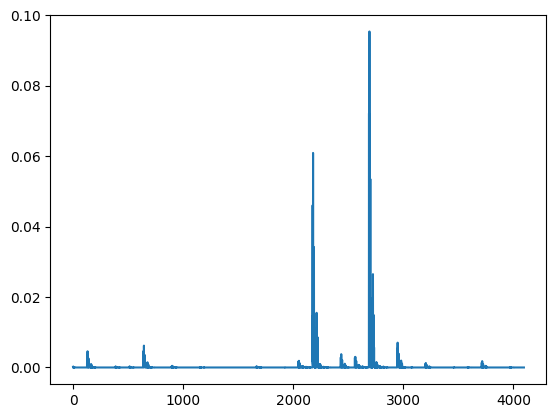

In [27]:

import numpy as np
import matplotlib.pyplot as plt
best_10 = np.argsort(svllp.probabilities.copy())[-1:-10:-1]
print(best_10)
best_10 = [svllp.get_str_from_index(b) for b in best_10]
print(best_10)
plt.plot(svllp.probabilities), [svllp.get_cost_from_str(b) for b in best_10]

In [ ]:
def seperate_beta(beta, interval):
    c, f = beta.__divmod__(interval)
    c = int(c)
    if f > interval/2:
        c = c + 1
        f = f - interval
    if np.abs(f) < 1e-2:
        f = 0
    assert np.isclose(c * interval + f, beta, atol=2e-2), (c * interval + f, beta)
    return c, f

seperate_beta(3.141592653589793/2, 0.1)

In [ ]:
# Define the function f(x, y)
def f(x, y):
    return np.sin(x) + np.cos(y)

def energy(beta, gamma):
    psi = svllp.unitary_b_approx(beta) @ unitary_a(svllp.ha,gamma,False) @ svllp.psi.copy()
    bra_psi = psi.conj().transpose()
    ket_psi = psi

    return (bra_psi @ (svllp.ha @ ket_psi)).real
    

# Generate x and y values
x = np.linspace(-np.pi/2, np.pi/2, 10)
y = np.linspace(-np.pi/2, np.pi/2, 10)

# Create a meshgrid from x and y values
X, Y = np.meshgrid(x, y)

# Calculate the function values for each point in the meshgrid
Z = np.vectorize(energy)(X, Y)

# Plot the heatmap
plt.imshow(Z, extent=(min(x), max(x), min(y), max(y)), cmap='viridis')  # You can choose a different colormap
plt.colorbar()

# Set labels
plt.xlabel('beta')
plt.ylabel('gamma')

# Show the plot
plt.show()


In [ ]:
from scipy.optimize import minimize

# Objective function to minimize
def objective_function(x):
    return x[0]**2 + x[1]**2

# Initial guess
initial_guess = [1.0, -9.0]

# Constraints

# Using COBYLA method for optimization
result = minimize(
    objective_function, initial_guess, method='COBYLA', options={
        'disp':True,
        'catol': 0.1
        
    }
)

result


In [24]:
np.argsort([3,1,4,1,5,9])[-1:-10:-1]

array([5, 4, 2, 0, 3, 1])